In [61]:
import os
import pandas as pd
import matplotlib.pyplot as plt

folder = "data"
file_path = os.path.join(folder, "prepared_data.csv")
df = pd.read_csv(file_path)

In [62]:
df.head()

OBEC  Rebelové  MZH  JaSaN  VÝZVA  SMSka  SPD  ČSSD  PŘÍSAHA  Levice  \
0  500011         0    1      2      2      0   93     3       18       0   
1  500020         0    2      0      0      1   87     0        9       1   
2  500046         0    0      1      0      2   63     2       13       1   
3  500054        13    0      4      3      7  736    11       55      34   
4  500062         0    0      0      1      3  100     0       13       1   

   ...                 obec_name  pop_total  pop_men  pop_women  \
0  ...  Želechovice nad Dřevnicí     1859.0    919.0      940.0   
1  ...         Petrov nad Desnou     1237.0    621.0      616.0   
2  ...                   Libhošť     1756.0    880.0      876.0   
3  ...                       NaN        NaN      NaN        NaN   
4  ...                    Krhová     2161.0   1081.0     1080.0   

   age_avg_total  age_avg_men  age_avg_women  okres_name  prop_men   log_pop  
0      45.980904    43.885201      48.029787        Zlín  0.494352  7.527794  
1      44.037591    42.987923      45.095779     Šumperk  0.502021  7.120444  
2      42.284738    41.171591      43.402968  Nový Jičín  0.501139  7.470794  
3            NaN          NaN            NaN         NaN       NaN       NaN  
4      42.569875    40.840426      44.300926      Vsetín  0.500231  7.678326  

[5 rows x 68 columns]

In [63]:
df.columns

Index(['OBEC', 'Rebelové', 'MZH', 'JaSaN', 'VÝZVA', 'SMSka', 'SPD', 'ČSSD',
       'PŘÍSAHA', 'Levice', 'ČR1', 'SPOLU', 'Švýcarská dem.',
       'Nevolte Urza.cz', 'HOP Hydra', 'Generace', 'Piráti', 'Koruna Česká',
       'Volt', 'PB', 'AUTO', 'BPS', 'ANO', 'STAN', 'Kruh', 'Stačilo!',
       'Voluntia', 'ODEVZ_OBAL', 'PL_HL_CELK', 'Rebelové_PROC', 'MZH_PROC',
       'JaSaN_PROC', 'VÝZVA_PROC', 'SMSka_PROC', 'SPD_PROC', 'ČSSD_PROC',
       'PŘÍSAHA_PROC', 'Levice_PROC', 'ČR1_PROC', 'SPOLU_PROC',
       'Švýcarská dem._PROC', 'Nevolte Urza.cz_PROC', 'HOP Hydra_PROC',
       'Generace_PROC', 'Piráti_PROC', 'Koruna Česká_PROC', 'Volt_PROC',
       'PB_PROC', 'AUTO_PROC', 'BPS_PROC', 'ANO_PROC', 'STAN_PROC',
       'Kruh_PROC', 'Stačilo!_PROC', 'Voluntia_PROC', 'PROC_NEPL_HLASU',
       'okres_code', 'obec_code', 'obec_name', 'pop_total', 'pop_men',
       'pop_women', 'age_avg_total', 'age_avg_men', 'age_avg_women',
       'okres_name', 'prop_men', 'log_pop'],
      dtype='object')

# Univariate analysis

In [64]:
import numpy as np

In [65]:
# make subdf containting onyl PROC columns and pop_total, 'age_avg_total', 'age_avg_men', 'age_avg_women', prop_men
col_a = ['SPD_PROC', 'SPOLU_PROC', 'Generace_PROC', 'Piráti_PROC', 'AUTO_PROC', 'ANO_PROC', 'STAN_PROC', 'Stačilo!_PROC']
# col_a = ['SPD_PROC']
col_b = ['log_pop', 'age_avg_total', 'age_avg_men', 'age_avg_women', 'prop_men']

pairs = [(a, b) for a in col_a for b in col_b]
# subdf = df[columns]

In [66]:
pairs

[('SPD_PROC', 'log_pop'),
 ('SPD_PROC', 'age_avg_total'),
 ('SPD_PROC', 'age_avg_men'),
 ('SPD_PROC', 'age_avg_women'),
 ('SPD_PROC', 'prop_men'),
 ('SPOLU_PROC', 'log_pop'),
 ('SPOLU_PROC', 'age_avg_total'),
 ('SPOLU_PROC', 'age_avg_men'),
 ('SPOLU_PROC', 'age_avg_women'),
 ('SPOLU_PROC', 'prop_men'),
 ('Generace_PROC', 'log_pop'),
 ('Generace_PROC', 'age_avg_total'),
 ('Generace_PROC', 'age_avg_men'),
 ('Generace_PROC', 'age_avg_women'),
 ('Generace_PROC', 'prop_men'),
 ('Piráti_PROC', 'log_pop'),
 ('Piráti_PROC', 'age_avg_total'),
 ('Piráti_PROC', 'age_avg_men'),
 ('Piráti_PROC', 'age_avg_women'),
 ('Piráti_PROC', 'prop_men'),
 ('AUTO_PROC', 'log_pop'),
 ('AUTO_PROC', 'age_avg_total'),
 ('AUTO_PROC', 'age_avg_men'),
 ('AUTO_PROC', 'age_avg_women'),
 ('AUTO_PROC', 'prop_men'),
 ('ANO_PROC', 'log_pop'),
 ('ANO_PROC', 'age_avg_total'),
 ('ANO_PROC', 'age_avg_men'),
 ('ANO_PROC', 'age_avg_women'),
 ('ANO_PROC', 'prop_men'),
 ('STAN_PROC', 'log_pop'),
 ('STAN_PROC', 'age_avg_total'),
 ('

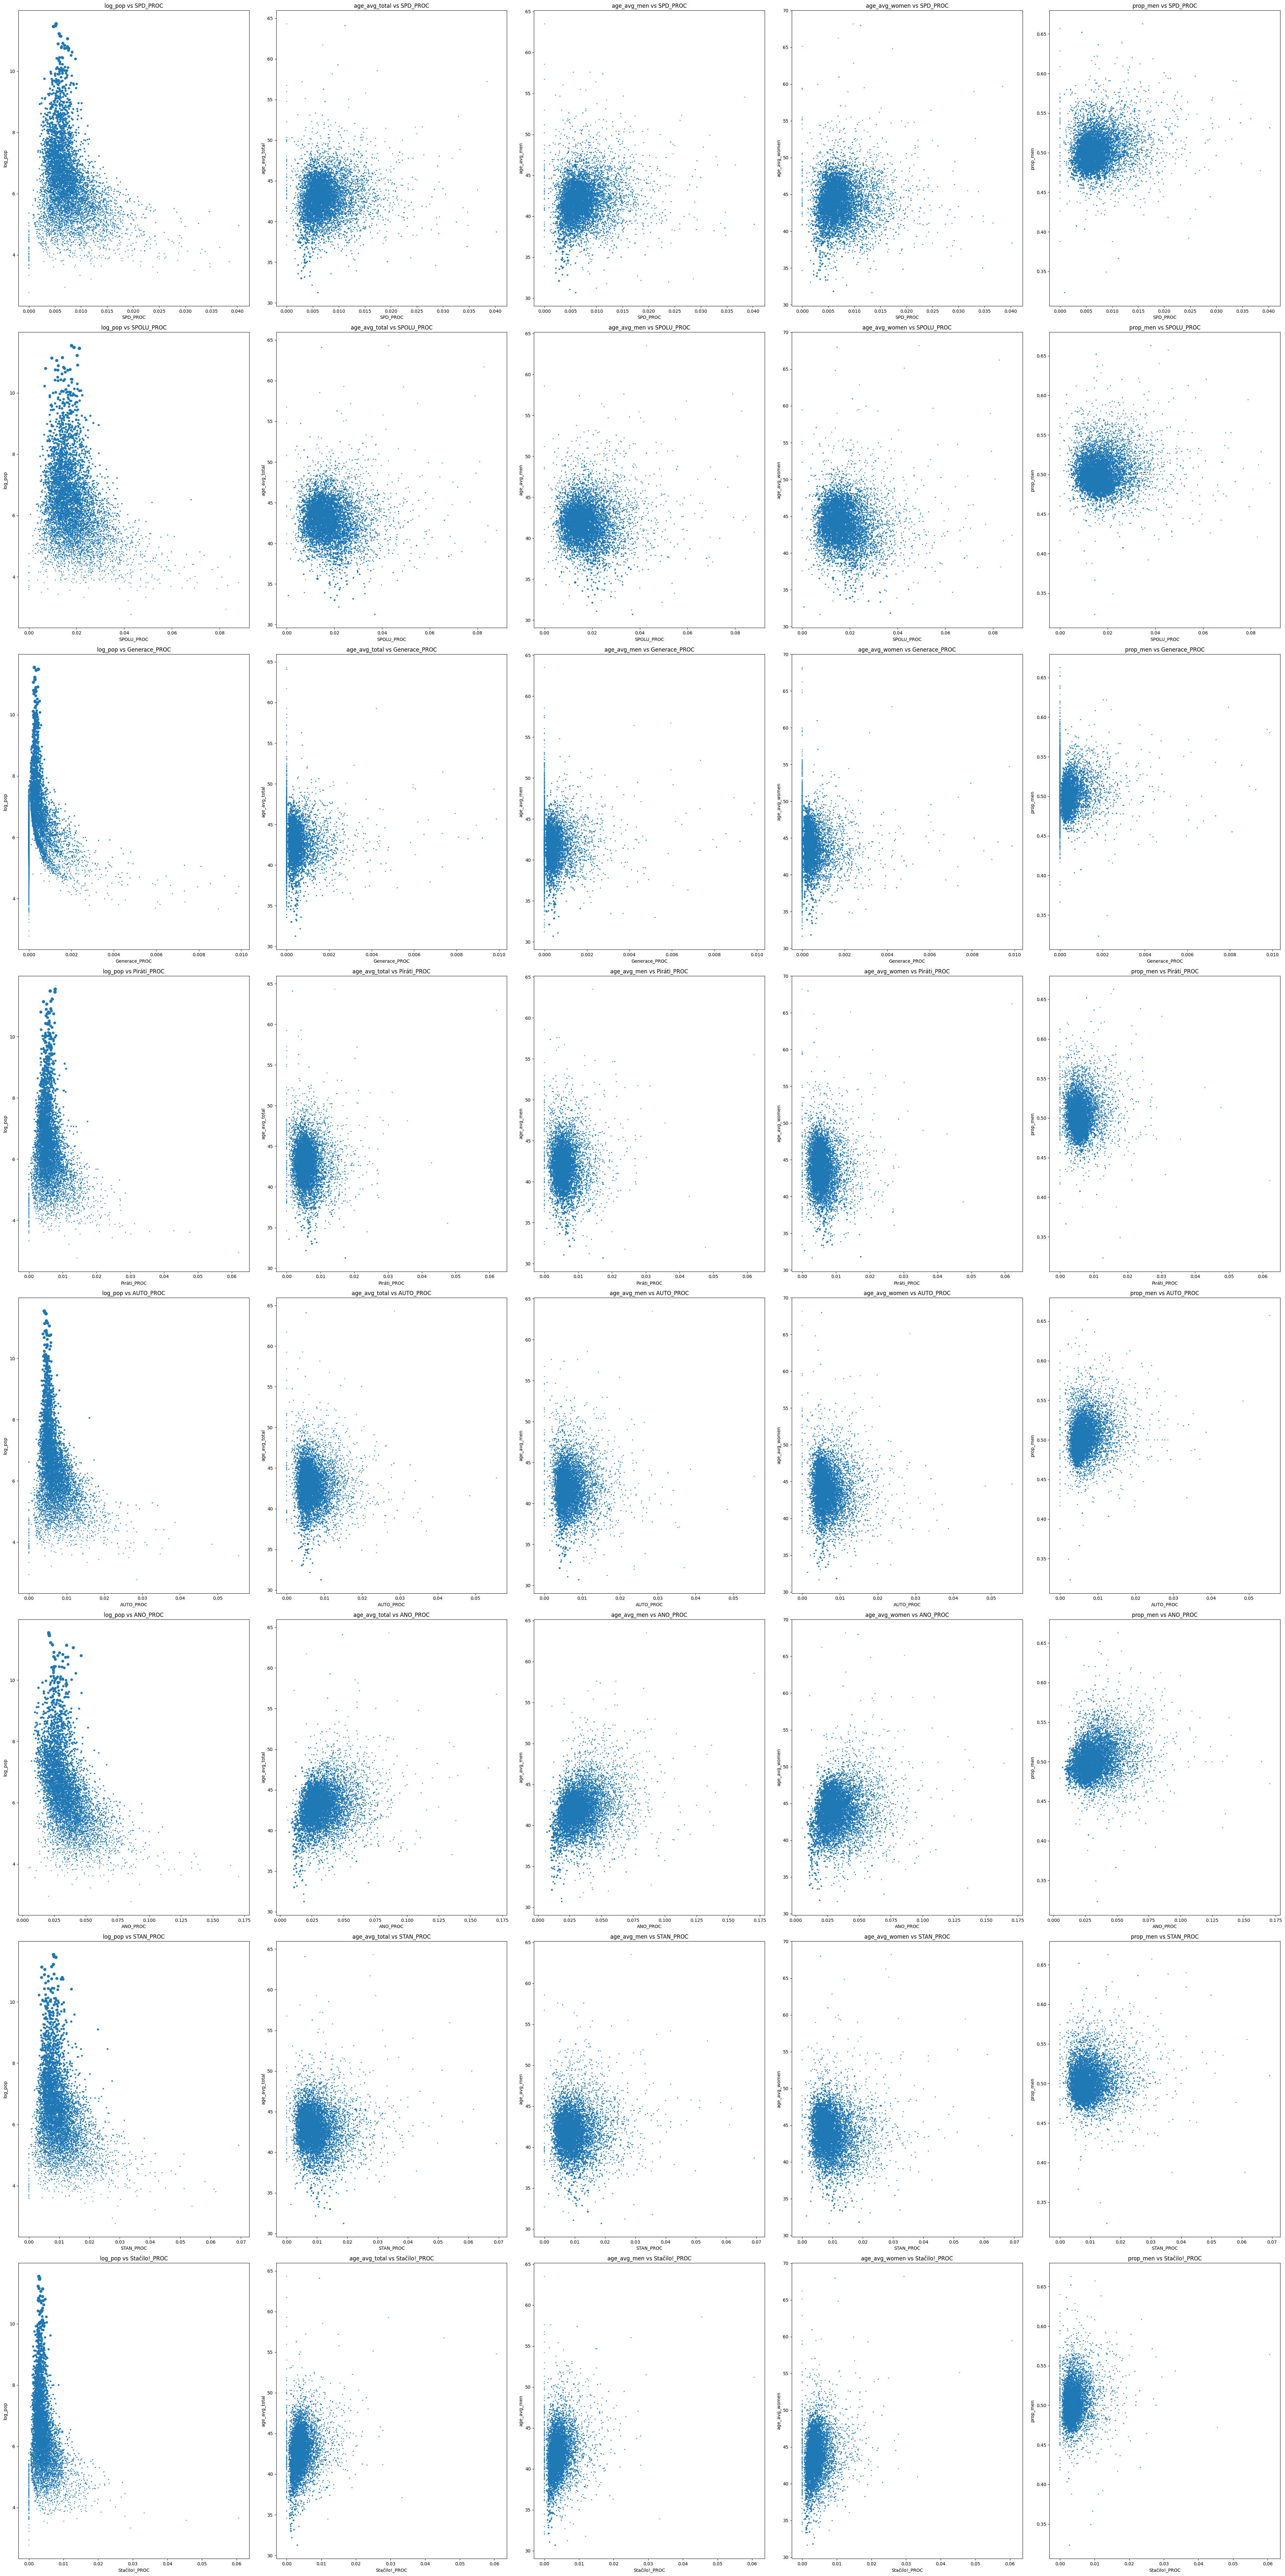

In [68]:
fig, axes = plt.subplots(len(col_a), len(col_b), figsize=(8*len(col_b), 10* len(col_a)))
axes = axes.ravel()

for ax, (x_col, y_col) in zip(axes, pairs):
    ax.scatter(df[x_col], df[y_col], s = np.sqrt(df['pop_total'] / 50))
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f'{y_col} vs {x_col}')

plt.tight_layout()
plt.show()